# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn import metrics

# Cleaning Data

In [3]:
churn_data = pd.read_csv('churn_data.csv')
churn_data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
customer_data = pd.read_csv('customer_data.csv')
customer_data

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [5]:
internet_data = pd.read_csv('internet_data.csv')
internet_data

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No


In [6]:
temporary_df = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [7]:
raw_data = pd.merge(temporary_df, internet_data, how='inner', on='customerID')

In [8]:
raw_data.shape

(7043, 21)

In [9]:
raw_data.head(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [11]:
raw_data.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [12]:
yes_no_columns = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
for index in yes_no_columns:
    raw_data[index] = raw_data[index].map({'Yes': 1, 'No': 0})

In [13]:
raw_data.head(10)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,8,1,Month-to-month,1,Electronic check,99.65,820.5,1,Female,0,0,0,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,22,1,Month-to-month,1,Credit card (automatic),89.10,1949.4,0,Male,0,0,1,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,10,0,Month-to-month,0,Mailed check,29.75,301.9,0,Female,0,0,0,No phone service,DSL,Yes,No,No,No,No,No
8,7892-POOKP,28,1,Month-to-month,1,Electronic check,104.80,3046.05,1,Female,0,1,0,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,62,1,One year,0,Bank transfer (automatic),56.15,3487.95,0,Male,0,0,1,No,DSL,Yes,Yes,No,No,No,No


In [14]:
col = internet_data.columns.drop('customerID')
col

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [15]:
dummy_data = pd.get_dummies(raw_data[col])
dummy_data

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
2,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0
4,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
7039,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1
7040,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
7041,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [16]:
dummy_data.columns

Index(['MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes'],
      dtype='object')

In [17]:
dummy_data = dummy_data.drop(columns=['MultipleLines_No phone service', 'InternetService_No', 'OnlineSecurity_No internet service',
                        'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service',
                        'StreamingTV_No internet service', 'StreamingMovies_No internet service'])

In [18]:
dummy_data['customerID'] = internet_data['customerID']
dummy_data

,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,customerID
0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,7590-VHVEG
1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,5575-GNVDE
2,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,3668-QPYBK
3,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,7795-CFOCW
4,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,9237-HQITU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,6840-RESVB
7039,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,2234-XADUH
7040,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,4801-JZAZL
7041,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,8361-LTMKD


In [19]:
raw_data = pd.merge(raw_data, dummy_data, on='customerID')

In [20]:
raw_data.shape

(7043, 37)

In [21]:
raw_data.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines_No',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [22]:
raw_data = raw_data.drop(columns=col)
raw_data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,One year,1,Mailed check,84.80,1990.5,0,Male,0,1,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,1,One year,1,Credit card (automatic),103.20,7362.9,0,Female,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1
7040,4801-JZAZL,11,0,Month-to-month,1,Electronic check,29.60,346.45,0,Female,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,4,1,Month-to-month,1,Mailed check,74.40,306.6,1,Male,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [23]:
raw_data.shape

(7043, 29)

In [24]:
raw_data.head(8)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
5,9305-CDSKC,8,1,Month-to-month,1,Electronic check,99.65,820.5,1,Female,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1
6,1452-KIOVK,22,1,Month-to-month,1,Credit card (automatic),89.10,1949.4,0,Male,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0
7,6713-OKOMC,10,0,Month-to-month,0,Mailed check,29.75,301.9,0,Female,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0


In [25]:
another_list = ['Contract', 'PaymentMethod']
another_dummy_data = pd.get_dummies(raw_data[another_list], drop_first=True)
another_dummy_data['customerID'] = churn_data['customerID']
another_dummy_data

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID
0,0,0,0,1,0,7590-VHVEG
1,1,0,0,0,1,5575-GNVDE
2,0,0,0,0,1,3668-QPYBK
3,1,0,0,0,0,7795-CFOCW
4,0,0,0,1,0,9237-HQITU
...,...,...,...,...,...,...
7038,1,0,0,0,1,6840-RESVB
7039,1,0,1,0,0,2234-XADUH
7040,0,0,0,1,0,4801-JZAZL
7041,0,0,0,0,1,8361-LTMKD


In [26]:
raw_data = pd.merge(raw_data, another_dummy_data, on='customerID')
raw_data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,One year,1,Mailed check,84.80,1990.5,0,Male,0,1,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1
7039,2234-XADUH,72,1,One year,1,Credit card (automatic),103.20,7362.9,0,Female,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0
7040,4801-JZAZL,11,0,Month-to-month,1,Electronic check,29.60,346.45,0,Female,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
7041,8361-LTMKD,4,1,Month-to-month,1,Mailed check,74.40,306.6,1,Male,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1


In [27]:
raw_data = raw_data.drop(columns=another_list)
raw_data

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,29.85,29.85,0,Female,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,Male,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,Male,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1
3,7795-CFOCW,45,0,0,42.30,1840.75,0,Male,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,Female,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,84.80,1990.5,0,Male,0,1,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1
7039,2234-XADUH,72,1,1,103.20,7362.9,0,Female,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0
7040,4801-JZAZL,11,0,1,29.60,346.45,0,Female,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
7041,8361-LTMKD,4,1,1,74.40,306.6,1,Male,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1


In [28]:
raw_data.gender = raw_data.gender.map({'Male': 1, 'Female': 0})

In [29]:
raw_data.head(10)

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,1,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1
3,7795-CFOCW,45,0,0,42.30,1840.75,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
5,9305-CDSKC,8,1,1,99.65,820.5,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0
6,1452-KIOVK,22,1,1,89.10,1949.4,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0
7,6713-OKOMC,10,0,0,29.75,301.9,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
8,7892-POOKP,28,1,1,104.80,3046.05,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0
9,6388-TABGU,62,1,0,56.15,3487.95,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0


In [30]:
def remove_false_values(row):
    if row == ' ':
        return np.nan
    else:
        return float(row)

In [31]:
raw_data.TotalCharges = raw_data.TotalCharges.apply(remove_false_values)

In [32]:
raw_data = raw_data[~raw_data.TotalCharges.isnull()]

In [33]:
raw_data

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,1,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1
3,7795-CFOCW,45,0,0,42.30,1840.75,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,84.80,1990.50,0,1,0,1,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1
7039,2234-XADUH,72,1,1,103.20,7362.90,0,0,0,1,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0
7040,4801-JZAZL,11,0,1,29.60,346.45,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
7041,8361-LTMKD,4,1,1,74.40,306.60,1,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1


# Building Model

In [34]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve
from sklearn.metrics import precision_recall_curve

In [35]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
y = raw_data.pop('Churn')

In [37]:
X = raw_data.drop(columns=['customerID'])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

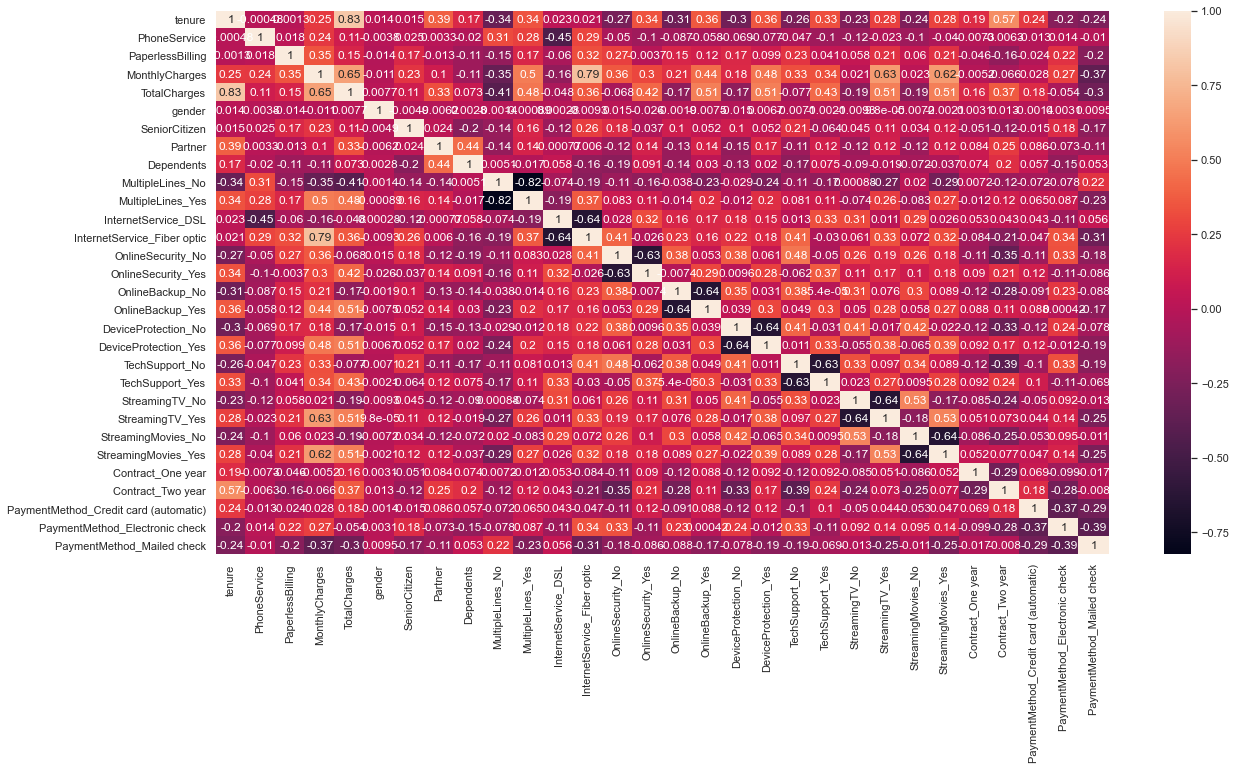

In [39]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [40]:
X_train.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [41]:
X_train = X_train.drop(columns=['InternetService_Fiber optic', 'MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No'])

In [42]:
X_train.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines_Yes', 'InternetService_DSL', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [43]:
X_test = X_test.drop(columns=['InternetService_Fiber optic', 'MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No'])

In [44]:
X_train.shape

(4922, 22)

In [45]:
X_test.shape

(2110, 23)

In [46]:
y_train.shape

(4922,)

In [47]:
y_test.shape

(2110,)

In [48]:
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines_Yes,InternetService_DSL,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
879,0.019693,1,1,-0.338074,-0.276449,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0
2784,-1.163880,1,1,1.106854,-0.835971,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0


In [49]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,tenure,True,1
19,PaymentMethod_Credit card (automatic),True,1
18,Contract_Two year,True,1
17,Contract_One year,True,1
16,StreamingMovies_Yes,True,1
14,TechSupport_Yes,True,1
13,DeviceProtection_Yes,True,1
12,OnlineBackup_Yes,True,1
11,OnlineSecurity_Yes,True,1
21,PaymentMethod_Mailed check,True,1


In [50]:
col = X_train.columns[rfe.support_]
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check'],
      dtype='object')

In [51]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
model = logm1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.4
Date:                Sat, 20 Feb 2021   Deviance:                       4022.9
Time:                        20:57:01   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.2343      0.200      1.172      0.241      -0.158       0.626
tenure                                   -1.4938      0.184     -8.114      0.000      -1.855      -1.133
PhoneService                             -1.1827      0.163     -7.244      0.000      -1.503      -0.863
PaperlessBilling                          0.3447      0.090      3.841      0.000       0.169       0.521
MonthlyCharges                            0.9510      0.087     10.909      0.000       0.780       1.122
TotalCharges                              0.6900      0.191      3.604      0.000       0.315       1.065
SeniorCitizen                             0.4263      0.100      4.277      0.000       0.231       0.622
OnlineSecurity_Yes                       -0.5288      0.102     -5.189      0.000      -0.729      -0.329
OnlineBackup_Yes                         -0.3308      0.094     -3.532      0.000      -0.514      -0.147
DeviceProtection_Yes                     -0.1988      0.097     -2.059      0.039      -0.388      -0.010
TechSupport_Yes                          -0.5386      0.101     -5.330      0.000      -0.737      -0.341
StreamingMovies_Yes                      -0.1901      0.103     -1.842      0.065      -0.392       0.012
Contract_One year                        -0.7067      0.127     -5.549      0.000      -0.956      -0.457
Contract_Two year                        -1.3000      0.211     -6.174      0.000      -1.713      -0.887
PaymentMethod_Credit card (automatic)    -0.3702      0.113     -3.285      0.001      -0.591      -0.149
PaymentMethod_Mailed check               -0.3799      0.111     -3.413      0.001      -0.598      -0.162
=========================================================================================================
"""

In [52]:
col = col.drop('StreamingMovies_Yes')
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check'],
      dtype='object')

In [53]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
model = logm1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.1
Date:                Sat, 20 Feb 2021   Deviance:                       4026.3
Time:                        20:57:02   Pearson chi2:                 6.10e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.0825      0.182      0.453      0.651      -0.275       0.440
tenure                                   -1.4729      0.183     -8.049      0.000      -1.832      -1.114
PhoneService                             -1.0939      0.156     -7.021      0.000      -1.399      -0.789
PaperlessBilling                          0.3460      0.090      3.857      0.000       0.170       0.522
MonthlyCharges                            0.8872      0.080     11.134      0.000       0.731       1.043
TotalCharges                              0.6558      0.190      3.454      0.001       0.284       1.028
SeniorCitizen                             0.4320      0.100      4.335      0.000       0.237       0.627
OnlineSecurity_Yes                       -0.5087      0.101     -5.019      0.000      -0.707      -0.310
OnlineBackup_Yes                         -0.3117      0.093     -3.345      0.001      -0.494      -0.129
DeviceProtection_Yes                     -0.1960      0.097     -2.029      0.042      -0.385      -0.007
TechSupport_Yes                          -0.5401      0.101     -5.336      0.000      -0.738      -0.342
Contract_One year                        -0.7308      0.127     -5.771      0.000      -0.979      -0.483
Contract_Two year                        -1.3263      0.210     -6.318      0.000      -1.738      -0.915
PaymentMethod_Credit card (automatic)    -0.3698      0.113     -3.280      0.001      -0.591      -0.149
PaymentMethod_Mailed check               -0.3820      0.111     -3.439      0.001      -0.600      -0.164
=========================================================================================================
"""

In [54]:
y_train_pred = model.predict(sm.add_constant(X_train[col]))
y_train_pred

879     0.184339
5790    0.305994
6498    0.645320
880     0.526681
2784    0.678468
          ...   
79      0.018424
3934    0.090655
5964    0.042057
6947    0.136268
5649    0.038706
Length: 4922, dtype: float64

In [55]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18433919, 0.30599437, 0.64531999, 0.5266814 , 0.67846837,
       0.3968572 , 0.40511019, 0.79639724, 0.25634535, 0.55091147])

In [56]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head(10)

,Churn,Churn_Prob,CustID
0,0,0.184339,879
1,0,0.305994,5790
2,1,0.645320,6498
3,1,0.526681,880
4,1,0.678468,2784
5,0,0.396857,3874
6,0,0.405110,5387
7,1,0.796397,6623
8,0,0.256345,4465
9,1,0.550911,5364


In [57]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.184339,879,0
1,0,0.305994,5790,0
2,1,0.645320,6498,1
3,1,0.526681,880,1
4,1,0.678468,2784,1


In [58]:
confusion = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
confusion

array([[3279,  356],
       [ 581,  706]], dtype=int64)

In [59]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [60]:
fpr

array([0.        , 0.        , 0.        , ..., 0.97083906, 0.97083906,
       1.        ])

In [61]:
tpr

array([0.00000000e+00, 7.77000777e-04, 2.33100233e-03, ...,
       9.99222999e-01, 1.00000000e+00, 1.00000000e+00])

In [62]:
thresholds

array([1.87209128e+00, 8.72091279e-01, 8.66850871e-01, ...,
       2.48639703e-03, 2.47789759e-03, 1.21803244e-03])

In [63]:
area = metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [64]:
# plt.figure(figsize=(12, 12))
# plt.plot(fpr, tpr, label='ROC Curve Area: %.2f' %area)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.title('ROC Curve', fontdict={'fontsize': 20})
# plt.xlabel('False Positive Rate', fontdict={'fontsize': 15})
# plt.ylabel('True Positive Rate', fontdict={'fontsize': 15})
# plt.show()

In [67]:
y_train_pred_final.Churn_Prob

0       0.184339
1       0.305994
2       0.645320
3       0.526681
4       0.678468
          ...   
4917    0.018424
4918    0.090655
4919    0.042057
4920    0.136268
4921    0.038706
Name: Churn_Prob, Length: 4922, dtype: float64

In [65]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for index in num:
    y_train_pred_final[index] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > index else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.184339,879,0,1,1,0,0,0,0,0,0,0,0
1,0,0.305994,5790,0,1,1,1,1,0,0,0,0,0,0
2,1,0.645320,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.526681,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.678468,2784,1,1,1,1,1,1,1,1,0,0,0


In [70]:
temp_df = y_train_pred_final.drop(columns=['CustID', 'predicted'])
temp_df

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.184339,1,1,0,0,0,0,0,0,0,0
1,0,0.305994,1,1,1,1,0,0,0,0,0,0
2,1,0.645320,1,1,1,1,1,1,1,0,0,0
3,1,0.526681,1,1,1,1,1,1,0,0,0,0
4,1,0.678468,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0,0.018424,1,0,0,0,0,0,0,0,0,0
4918,0,0.090655,1,0,0,0,0,0,0,0,0,0
4919,0,0.042057,1,0,0,0,0,0,0,0,0,0
4920,0,0.136268,1,1,0,0,0,0,0,0,0,0


In [71]:
temp_df.to_csv('hello.csv')

In [86]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.261479,1.000000,0.000000
0.1,0.1,0.619870,0.945610,0.504539
0.2,0.2,0.716172,0.866356,0.662999
0.3,0.3,0.769606,0.769231,0.769739
0.4,0.4,0.794799,0.668221,0.839615
0.5,0.5,0.809630,0.548563,0.902063
0.6,0.6,0.800691,0.384615,0.948006
0.7,0.7,0.779155,0.200466,0.984044
0.8,0.8,0.747257,0.038850,0.998074
0.9,0.9,0.738521,0.000000,1.000000


<AxesSubplot:xlabel='prob'>

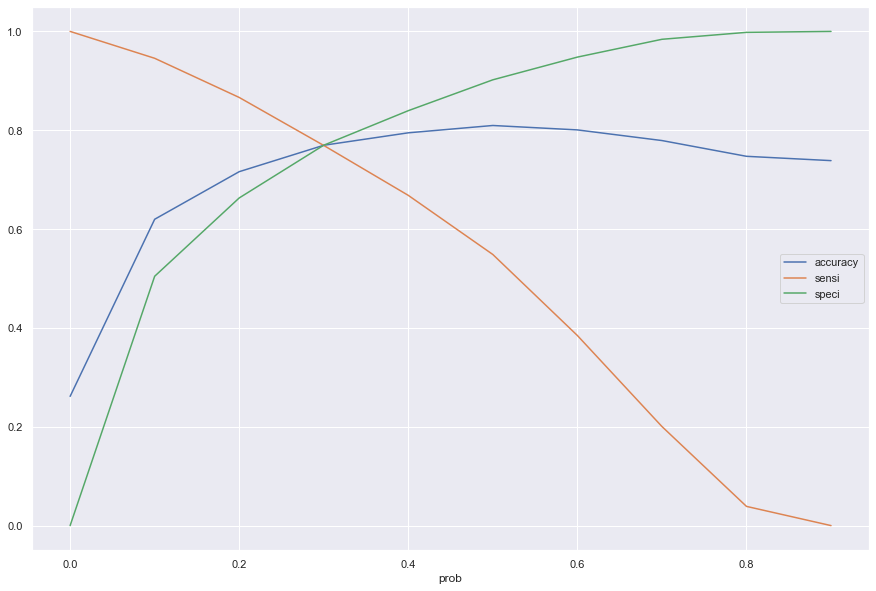

In [87]:
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])

In [90]:
y_train_pred_final[0.3]

0       0
1       1
2       1
3       1
4       1
       ..
4917    0
4918    0
4919    0
4920    0
4921    0
Name: 0.3, Length: 4922, dtype: int64

In [89]:
new_confusion = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[0.3])
new_confusion

array([[2798,  837],
       [ 297,  990]], dtype=int64)

In [91]:
test_df = pd.read_csv('test.csv', index_col='Sr')

In [92]:
test_df

,Actual,Predicted,Predicted_Round
Sr,,,
1,0,0.34,0
2,1,0.58,1
3,1,0.79,1
4,0,0.68,1
5,0,0.21,0
6,0,0.04,0
7,1,0.48,0
8,1,0.64,1
9,0,0.61,1


In [93]:
confusion = metrics.confusion_matrix(test_df.Actual, test_df.Predicted_Round)
confusion

array([[3, 2],
       [1, 4]], dtype=int64)

In [94]:
print(metrics.accuracy_score(test_df.Actual, test_df.Predicted_Round))

0.7


In [96]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(test_df.Actual, test_df.Predicted_Round)

In [101]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for index in num:
    test_df[index] = test_df.Predicted.map(lambda x: 1 if x > index else 0)
test_df.head()

,Actual,Predicted,Predicted_Round,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Sr,,,,,,,,,,,,,
1,0,0.34,0,1,1,1,1,0,0,0,0,0,0
2,1,0.58,1,1,1,1,1,1,1,0,0,0,0
3,1,0.79,1,1,1,1,1,1,1,1,1,0,0
4,0,0.68,1,1,1,1,1,1,1,1,0,0,0
5,0,0.21,0,1,1,1,0,0,0,0,0,0,0


In [102]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
for i in num:
    cm1 = metrics.confusion_matrix(test_df.Actual, test_df[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.5,1.0,0.0
0.1,0.1,0.6,1.0,0.2
0.2,0.2,0.6,1.0,0.2
0.3,0.3,0.7,1.0,0.4
0.4,0.4,0.8,1.0,0.6
0.5,0.5,0.7,0.8,0.6
0.6,0.6,0.6,0.6,0.6
0.7,0.7,0.7,0.4,1.0
0.8,0.8,0.6,0.2,1.0
0.9,0.9,0.5,0.0,1.0


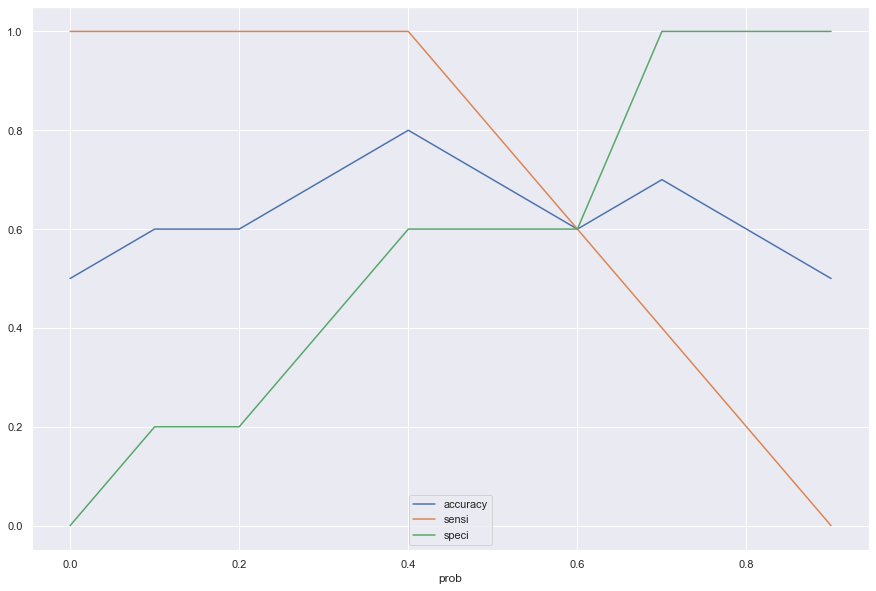

In [103]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()